# Data Preprocessing

In [6]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    n_target = len(set(data['target']))
    targets = np_utils.to_categorical(np.array(data['target']), n_target)
    return files, targets

cat_files, cat_targets = load_dataset('catImages')

# load list of cat names
cat_names = [item[10:-1] for item in sorted(glob("catImages/*/"))]

# print statistics about the dataset
print('There are %d total cat categories.' % len(cat_names))
print('There are %s total cat images.\n' % len(cat_files))

There are 54 total cat categories.
There are 10091 total cat images.



In [7]:
cat_names

['Abyssinian_cat',
 'American_Bobtail',
 'American_Curl',
 'American_Shorthair',
 'American_Wirehair',
 'Balinese_cat',
 'Bengal_cat',
 'Birman',
 'Bombay_cat',
 'British_Shorthair',
 'Burmese_cat',
 'Burmilla',
 'Caracal',
 'Chartreux',
 'Colorpoint_Shorthair',
 'Cornish_Rex',
 'Cymric_cat',
 'Devon_Rex',
 'Dragon_Li',
 'Egyptian_Mau',
 'Exotic_Shorthair',
 'Havana_Brown_cat',
 'Himalayan_cat',
 'Japanese_Bobtail',
 'Korat',
 'LaPerm',
 'Lynx',
 'Maine_Coon',
 'Manx_cat',
 'Munchkin_cat',
 'Nebelung',
 'Norwegian_Forest_cat',
 'Ocicat',
 'Oriental_Shorthair',
 'Pallas_cat',
 'Persian_cat',
 'Peterbald',
 'Pixie-bob',
 'Ragamuffin_cat',
 'Ragdoll',
 'Russian_Blue',
 'Savannah_cat',
 'Scottish_Fold',
 'Selkirk_Rex',
 'Siamese_cat',
 'Siberian_cat',
 'Singapura_cat',
 'Snow_leopard',
 'Snowshoe_cat',
 'Somali_cat',
 'Sphynx_cat',
 'Tonkinese_cat',
 'Turkish_Angora',
 'Turkish_Van']

In [4]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [8]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
cat_tensors = paths_to_tensor(cat_files).astype('float32')/255

  0%|          | 0/10091 [00:00<?, ?it/s]/home/aind2/anaconda3/envs/aind-dog/lib/python3.6/site-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|██████████| 10091/10091 [01:56<00:00, 86.70it/s] 


In [11]:
from keras.applications.xception import Xception, preprocess_input

x = preprocess_input(paths_to_tensor(cat_files))
y = cat_targets

model = Xception(weights='imagenet', include_top=False)

cat_x = model.predict(x)
cat_y = y[:cat_x.shape[0]]

  0%|          | 0/10091 [00:00<?, ?it/s]/home/aind2/anaconda3/envs/aind-dog/lib/python3.6/site-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
100%|██████████| 10091/10091 [01:55<00:00, 87.16it/s] 


In [13]:
np.save('saved/bottleneck_features.npy', cat_x)
# cat_x = np.load('saved/bottleneck_features.npy')
cat_x.shape

(10091, 7, 7, 2048)

# Model Training

In [19]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

Xception_model = Sequential()
Xception_model.add(GlobalAveragePooling2D(input_shape=cat_x.shape[1:]))
Xception_model.add(Dense(len(cat_names), activation='softmax'))

Xception_model.summary()
Xception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 54)                110646    
Total params: 110,646.0
Trainable params: 110,646.0
Non-trainable params: 0.0
_________________________________________________________________


In [20]:
Xception_model.fit(cat_x, cat_y, epochs=25, batch_size=26, verbose=1)

Epoch 1/25
10091/10091 [==============================] - 3s - loss: 2.1665 - acc: 0.3938     
Epoch 2/25
10091/10091 [==============================] - 3s - loss: 1.5488 - acc: 0.5450     
Epoch 3/25
10091/10091 [==============================] - 3s - loss: 1.3692 - acc: 0.5979     
Epoch 4/25
10091/10091 [==============================] - 3s - loss: 1.2515 - acc: 0.6361     
Epoch 5/25
10091/10091 [==============================] - 3s - loss: 1.1626 - acc: 0.6579     
Epoch 6/25
10091/10091 [==============================] - 3s - loss: 1.0863 - acc: 0.6842     
Epoch 7/25
10091/10091 [==============================] - 3s - loss: 1.0268 - acc: 0.6915     
Epoch 8/25
10091/10091 [==============================] - 3s - loss: 0.9690 - acc: 0.7119     
Epoch 9/25
10091/10091 [==============================] - 3s - loss: 0.9187 - acc: 0.7311     
Epoch 10/25
10091/10091 [==============================] - 3s - loss: 0.8750 - acc: 0.7472     
Epoch 11/25
10091/10091 [========================

# Cat App

In [21]:
from extract_bottleneck_features import *
from operator import itemgetter

def Xception_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Xception(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Xception_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return cat_names[np.argmax(predicted_vector)]

def Xception_top3_breeds(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Xception(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Xception_model.predict(bottleneck_feature)[0]
    # return dog breed that is predicted by the model
    ind = np.argpartition(predicted_vector, -3)[-3:]
    return sorted([(cat_names[ind[i]], predicted_vector[ind[i]]) for i in range(3)], key=itemgetter(1), reverse=True)

In [28]:
import matplotlib.pyplot as plt                        
%matplotlib inline   

def cat_app(img_path):
    import matplotlib.image as mpimg
    print("Welcome to cat matrix v1.0! (from an AI)")
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
    print("seems like:")
    for name, prob in Xception_top3_breeds(img_path):
        print("{} with prob {}".format(name, prob))

Welcome to cat matrix v1.0! (from an AI)


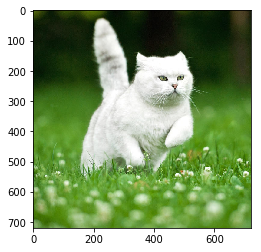

seems like:
Exotic_Shorthair with prob 0.9740176200866699
Scottish_Fold with prob 0.02357117086648941
Persian_cat with prob 0.0011377979535609484


In [29]:
cat_app("appImages/caturday-shutterstock_149320799.jpg")

Welcome to cat matrix v1.0! (from an AI)


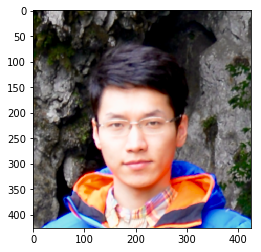

seems like:
Snow_leopard with prob 0.8547574877738953
Pixie-bob with prob 0.09738162904977798
Lynx with prob 0.030669385567307472


In [30]:
cat_app("appImages/DSC_6037.head.png")

Welcome to cat matrix v1.0! (from an AI)


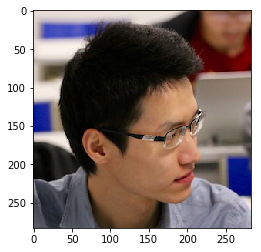

seems like:
Bengal_cat with prob 0.45560210943222046
British_Shorthair with prob 0.2784444987773895
Turkish_Angora with prob 0.17631351947784424


In [31]:
cat_app("appImages/IMG_0031 copy.jpg")

Welcome to cat matrix v1.0! (from an AI)


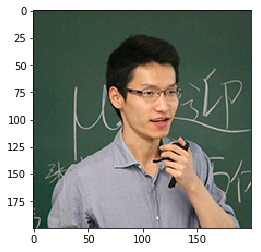

seems like:
Snow_leopard with prob 0.8419680595397949
Sphynx_cat with prob 0.07098332792520523
Egyptian_Mau with prob 0.017923586070537567


In [32]:
cat_app("appImages/IMG_0054.small.jpg")

Welcome to cat matrix v1.0! (from an AI)


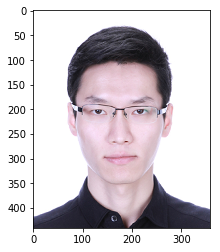

seems like:
Bombay_cat with prob 0.2989731431007385
Turkish_Angora with prob 0.17424850165843964
LaPerm with prob 0.10942612588405609


In [33]:
cat_app("appImages/zmy.jpg")

Welcome to cat matrix v1.0! (from an AI)


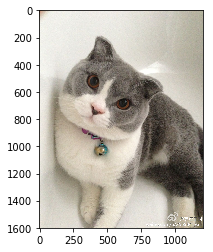

seems like:
Russian_Blue with prob 0.9883344173431396
British_Shorthair with prob 0.008029639720916748
Scottish_Fold with prob 0.0017290487885475159


In [34]:
cat_app("appImages/992cad0bjw1dzdm7ovlskj.jpg")

Welcome to cat matrix v1.0! (from an AI)


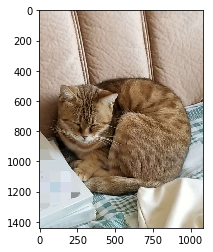

seems like:
Cymric_cat with prob 0.21092183887958527
Selkirk_Rex with prob 0.1813770830631256
American_Bobtail with prob 0.174607053399086


In [35]:
cat_app("appImages/WechatIMG31.jpeg")

Welcome to cat matrix v1.0! (from an AI)


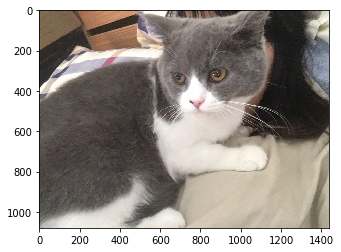

seems like:
Munchkin_cat with prob 0.4802316129207611
Russian_Blue with prob 0.17179453372955322
Korat with prob 0.11064841598272324


In [36]:
cat_app("appImages/WechatIMG32.jpeg")